In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
trips_original = pd.read_csv('./processed-original-trips-end-at-imd-2024-spring-thursday.csv')
trips_imputed = pd.read_csv('./processed-knn_imputed_-trips-end-at-imd-2024-spring-thursday.csv')
trips_original['auto_cost'] =  trips_original['parking_cost'] 
trips_imputed['auto_cost'] =  trips_imputed['parking_cost']

## Imputation rate

In [5]:
# Select target columns
target_columns = [
    'transit_cost', 'auto_cost', 'transit_time', 'transit_dist',
    'auto_time', 'auto_dist', 'bike_time', 'bike_dist',
    'walk_time', 'walk_dist'
]

# Calculate missing rate and available rate
missing_rate = trips_original[target_columns].isnull().mean()
available_rate = 1 - missing_rate

# Build the summary table
imputation_summary = pd.DataFrame({
    'original_available_rate (%)': available_rate * 100,
    'original_missing_rate (%)': missing_rate * 100,
    'imputed_rate (%)': missing_rate * 100
})

# Round to 2 decimals
imputation_summary = imputation_summary.round(2)

# Display
imputation_summary

,original_available_rate (%),original_missing_rate (%),imputed_rate (%)
transit_cost,0.69,99.31,99.31
auto_cost,1.72,98.28,98.28
transit_time,50.13,49.87,49.87
transit_dist,50.13,49.87,49.87
auto_time,98.97,1.03,1.03
auto_dist,98.97,1.03,1.03
bike_time,29.19,70.81,70.81
bike_dist,29.19,70.81,70.81
walk_time,29.43,70.57,70.57
walk_dist,29.43,70.57,70.57


## Compare distribution

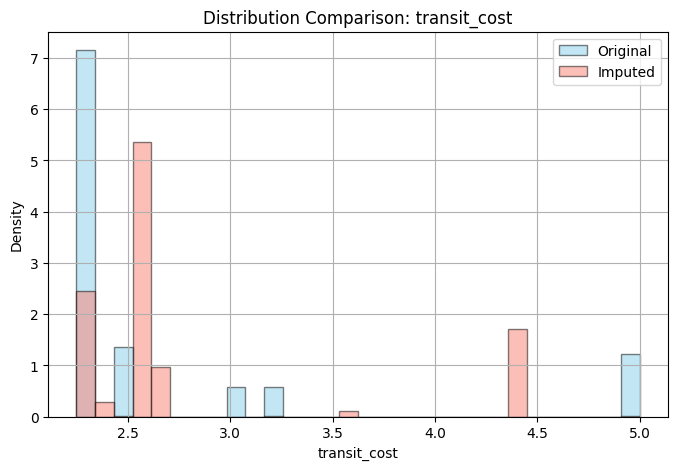

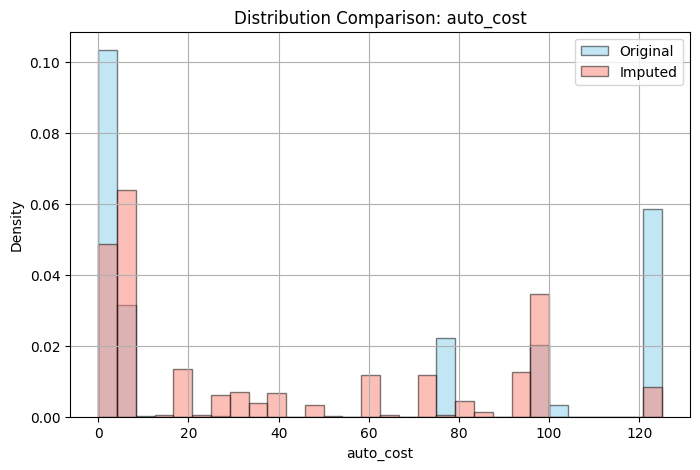

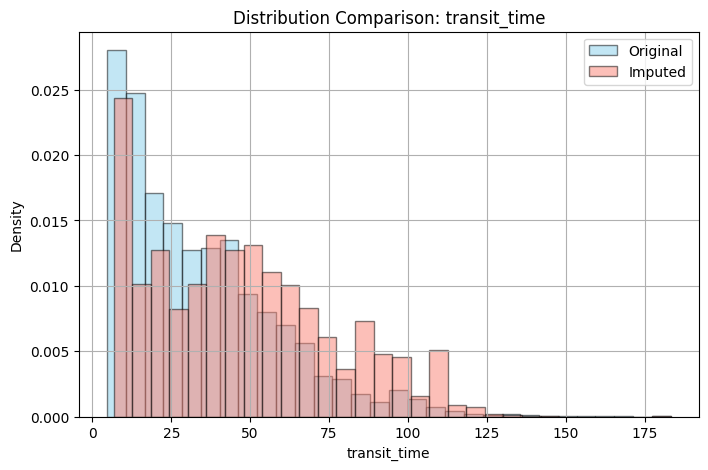

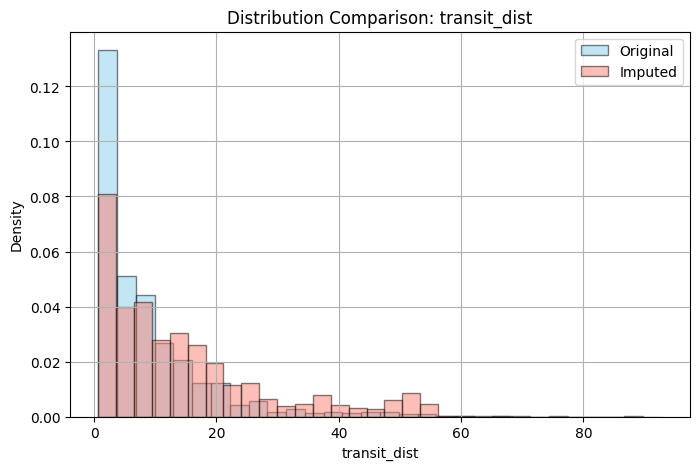

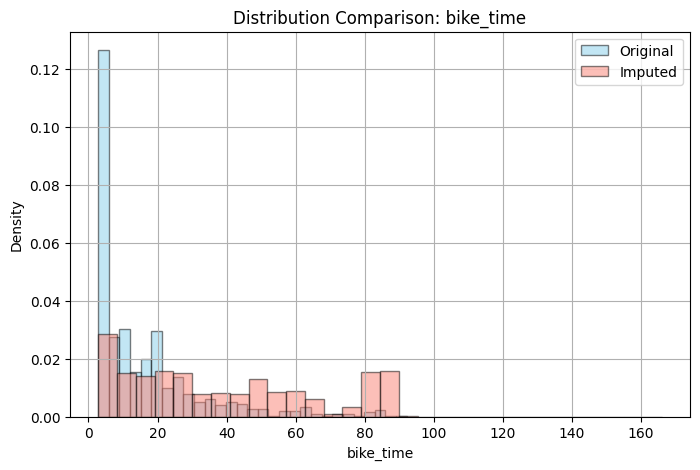

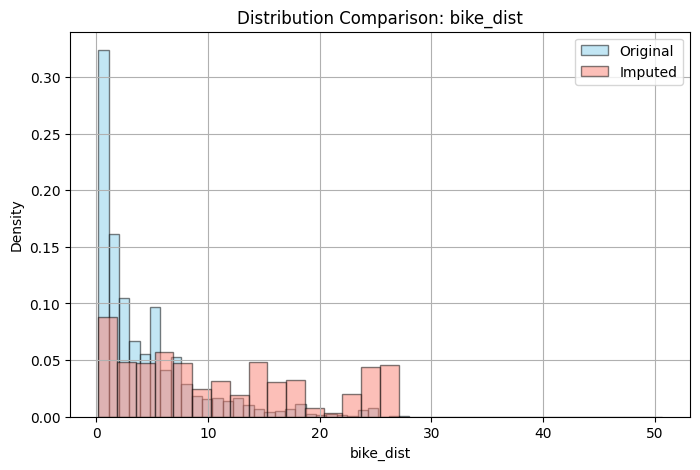

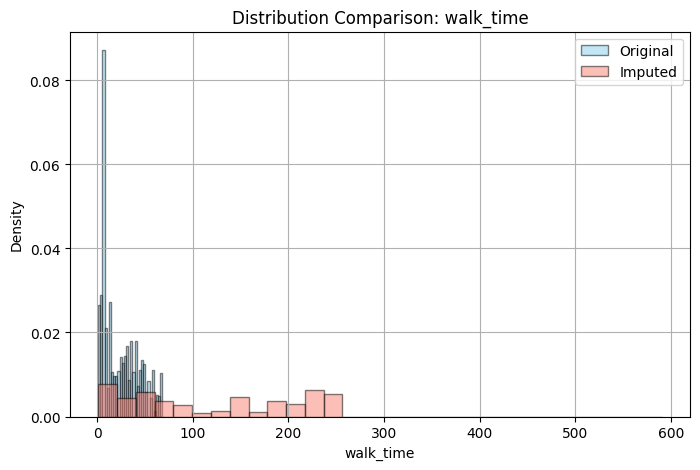

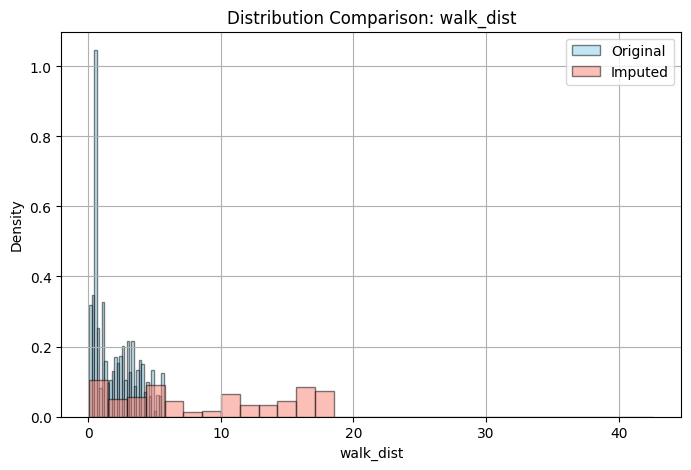

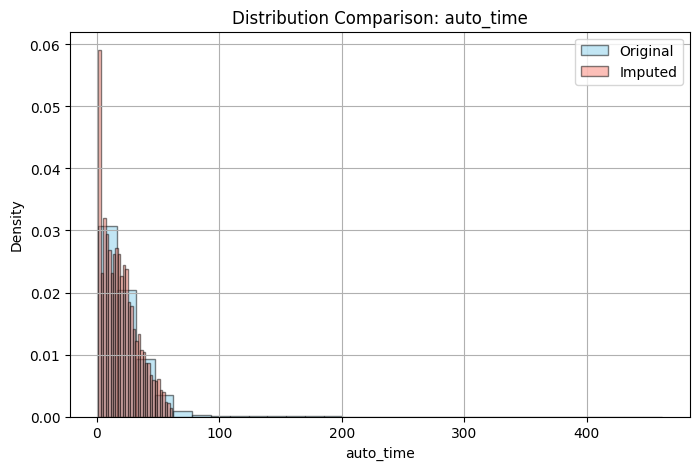

In [6]:
import matplotlib.pyplot as plt

# Variables with imputation rate > 10%
vars_to_compare = [
    'transit_cost', 'auto_cost',
    'transit_time', 'transit_dist',
    'bike_time', 'bike_dist',
    'walk_time', 'walk_dist',
    'auto_time'
]

# Plot distribution comparison
for var in vars_to_compare:
    plt.figure(figsize=(8, 5))
    
    plt.hist(trips_original[var].dropna(), bins=30, alpha=0.5, label='Original', density=True, color='skyblue', edgecolor='black')
    plt.hist(trips_imputed[var], bins=30, alpha=0.5, label='Imputed', density=True, color='salmon', edgecolor='black')
    
    plt.title(f'Distribution Comparison: {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()